In [37]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [39]:
# we will only observe the pattern between petal length and width features for this clustering problem
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
# removing sepal length and sepal width
data.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 'columns', inplace = True)
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


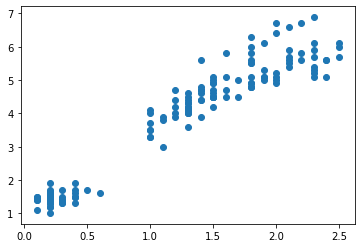

In [43]:
# plotting the data
plt.scatter(data['petal width (cm)'], data['petal length (cm)'])

In [44]:
# using elbow methods to find best number of clusters
k_list = range(1,11)
sse = []

for k in k_list:
    km = KMeans(n_clusters = k)
    km.fit(data)
    sse.append(km.inertia_)
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.07065234189628,
 9.244938551786376,
 7.745948930296759,
 6.545263125763126,
 5.704365024006968]

([<matplotlib.axis.XTick at 0xd789da3668>,
 <a list of 10 Text xticklabel objects>)

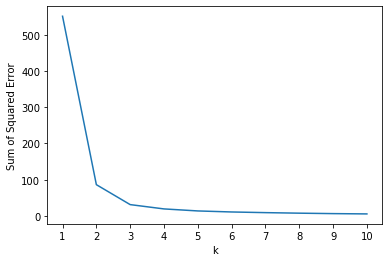

In [45]:
# plotting the elbow
plt.plot(k_list, sse)
plt.xlabel("k")
plt.ylabel("Sum of Squared Error")
plt.xticks(k_list)
# we can see the best number of clusters are 3

In [46]:
# clustering with 3 clusters
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(data)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
# adding cluster predictions to our data
data['cluster'] = y_pred
data.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


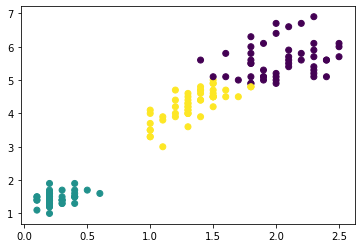

In [55]:
# plotting the data according to clusters
plt.scatter(data['petal width (cm)'], data['petal length (cm)'], c = data.cluster)

# we can see that the data has been clustered well

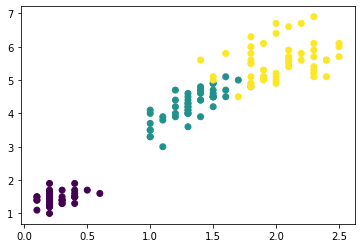

In [59]:
# cross checking clustering using available target in the iris data
data['target'] = iris.target
plt.scatter(data['petal width (cm)'], data['petal length (cm)'], c = data.target)

# both the plots show similar grouping thus we can conclude clustering is good
# we can say that the three classes can be correctly differentiated using clustering